<a href="https://colab.research.google.com/github/Asif-PA/E-Commerce-Project/blob/main/Ecommerce_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
# display all columns of the dataframe
pd.options.display.max_columns = None


In [3]:
df=pd.read_csv('/content/Train (2).csv')

In [4]:
df.head(15)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [5]:
df.shape

(10999, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [7]:
df.isnull().sum()

,0
ID,0
Warehouse_block,0
Mode_of_Shipment,0
Customer_care_calls,0
Customer_rating,0
Cost_of_the_Product,0
Prior_purchases,0
Product_importance,0
Gender,0
Discount_offered,0


**No missing  values present**

In [8]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

**Renaming dataset column for better readabity**

In [9]:
df.rename(columns={
    'Warehouse_block': 'WarehouseBlock',
    'Mode_of_Shipment': 'ShipmentMode',
    'Customer_care_calls': 'CustomerCareCalls',
    'Customer_rating': 'CustomerRating',
    'Cost_of_the_Product': 'ProductCost',
    'Prior_purchases': 'PriorPurchases',
    'Product_importance': 'ProductImportance',
    'Discount_offered': 'DiscountOffered',
    'Weight_in_gms': 'WeightInGrams',
    'Reached.on.Time_Y.N': 'ReachedOnTime'
}, inplace=True)

df.columns.tolist()


['ID',
 'WarehouseBlock',
 'ShipmentMode',
 'CustomerCareCalls',
 'CustomerRating',
 'ProductCost',
 'PriorPurchases',
 'ProductImportance',
 'Gender',
 'DiscountOffered',
 'WeightInGrams',
 'ReachedOnTime']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 10999 non-null  int64 
 1   WarehouseBlock     10999 non-null  object
 2   ShipmentMode       10999 non-null  object
 3   CustomerCareCalls  10999 non-null  int64 
 4   CustomerRating     10999 non-null  int64 
 5   ProductCost        10999 non-null  int64 
 6   PriorPurchases     10999 non-null  int64 
 7   ProductImportance  10999 non-null  object
 8   Gender             10999 non-null  object
 9   DiscountOffered    10999 non-null  int64 
 10  WeightInGrams      10999 non-null  int64 
 11  ReachedOnTime      10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


**dropping the irrelevent column**

In [11]:
df.drop(columns=['ID'], inplace=True)

In [12]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('ReachedOnTime')
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Numerical Features (excluding target):", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features (excluding target): ['CustomerCareCalls', 'CustomerRating', 'ProductCost', 'PriorPurchases', 'DiscountOffered', 'WeightInGrams']
Categorical Features: ['WarehouseBlock', 'ShipmentMode', 'ProductImportance', 'Gender']


**seprarting the categoricla and numerical features for deatiled exploaratory data analysis**

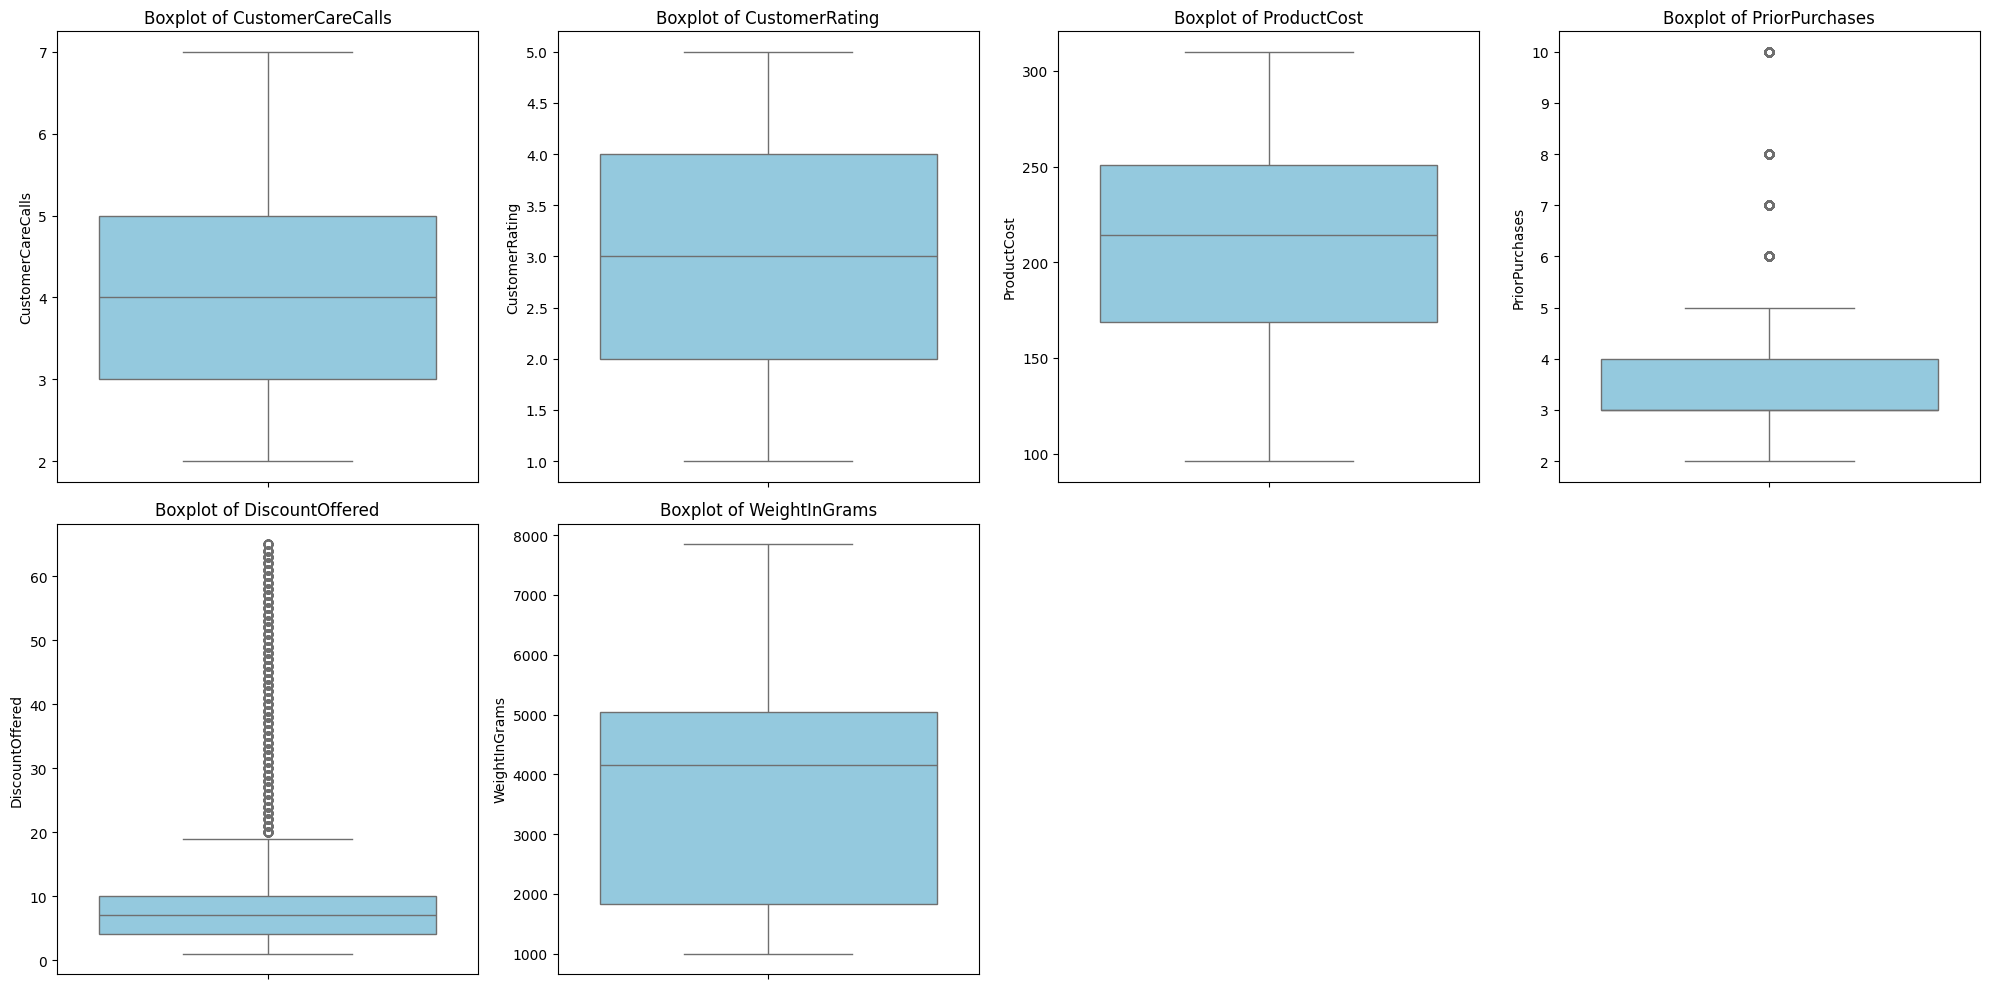

In [13]:
#boxplots for numerical features
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

**Most of the feurtes doesnt have outliers, we will try power transformer for the featiures that have outlier**

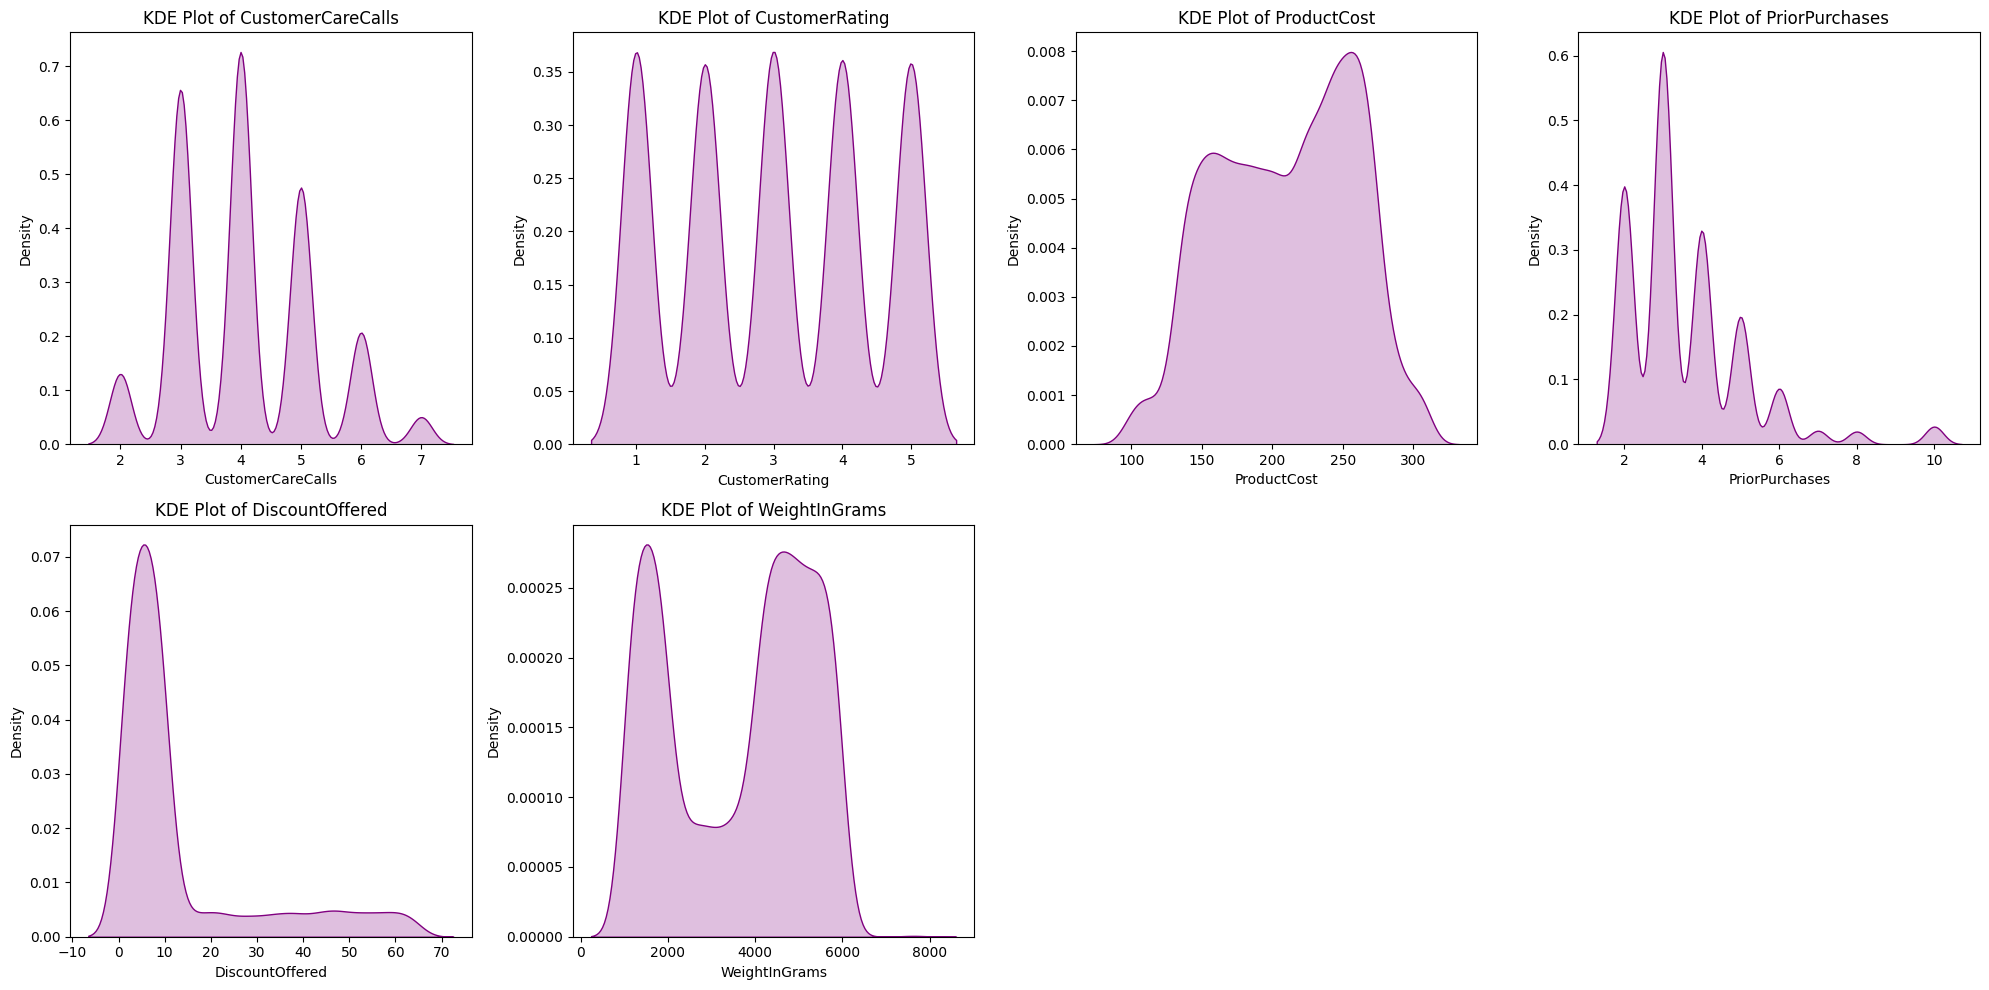

In [14]:
# KDE
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 4, i + 1)
    sns.kdeplot(df[col], shade=True, color='purple')
    plt.title(f'KDE Plot of {col}')

plt.tight_layout()
plt.show()

In [15]:
# Value counts for each categorical feature
for col in categorical_features:
    print(f"\nValue counts for '{col}':\n")
    print(df[col].value_counts())
    print("-" * 40)


Value counts for 'WarehouseBlock':

WarehouseBlock
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64
----------------------------------------

Value counts for 'ShipmentMode':

ShipmentMode
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64
----------------------------------------

Value counts for 'ProductImportance':

ProductImportance
low       5297
medium    4754
high       948
Name: count, dtype: int64
----------------------------------------

Value counts for 'Gender':

Gender
F    5545
M    5454
Name: count, dtype: int64
----------------------------------------


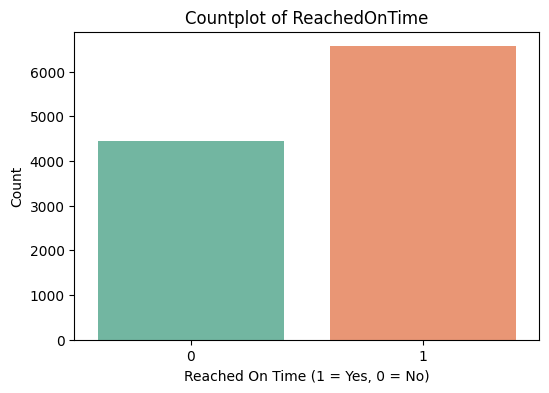

In [16]:
# Countplot for the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='ReachedOnTime', data=df, palette='Set2')
plt.title('Countplot of ReachedOnTime')
plt.xlabel('Reached On Time (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()


In [17]:
df['ReachedOnTime'].value_counts(normalize=True)

,proportion
ReachedOnTime,
1,0.596691
0,0.403309


>**Upon Checking the categorical variables the target variable is fairly balanced**

>**Ware house feature should be Lable encoded, the gender and shipment mode can be one hot encoded**

>**Product Impotance can be Ordinal encoded as it have a natural Order**

In [18]:
from scipy.stats import pointbiserialr
for col in numerical_features:
    corr, p_value = pointbiserialr(df[col], df['ReachedOnTime'])
    print(f"Point Biserial Correlation between '{col}' and 'ReachedOnTime': {corr:.4f} (p-value: {p_value:.4f})")


Point Biserial Correlation between 'CustomerCareCalls' and 'ReachedOnTime': -0.0671 (p-value: 0.0000)
Point Biserial Correlation between 'CustomerRating' and 'ReachedOnTime': 0.0131 (p-value: 0.1689)
Point Biserial Correlation between 'ProductCost' and 'ReachedOnTime': -0.0736 (p-value: 0.0000)
Point Biserial Correlation between 'PriorPurchases' and 'ReachedOnTime': -0.0555 (p-value: 0.0000)
Point Biserial Correlation between 'DiscountOffered' and 'ReachedOnTime': 0.3971 (p-value: 0.0000)
Point Biserial Correlation between 'WeightInGrams' and 'ReachedOnTime': -0.2688 (p-value: 0.0000)


**Point Biserial Correlation Analysis:
We calculated the point biserial correlation between numerical features and the target variable 'ReachedOnTime'. 'DiscountOffered' shows the strongest positive correlation (0.3971), while 'WeightInGrams' has a moderate negative correlation (-0.2688). Features like 'CustomerCareCalls' and 'ProductCost' show weaker negative relationships, suggesting limited impact individually.**

In [19]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['ReachedOnTime'])
y = df['ReachedOnTime']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (8799, 10)
Test shape: (2200, 10)


**We do the encoding after splitting to avoid the data leakage. If we do the encode before, the model will try to learn there is a posibilty of data leakage,may be we would be getting a better perfomance on paper but when we do it on real world datas after deployimg it may have performed badly**

In [20]:
# One-hot encode Gender and ShipmentMode
X_train = pd.get_dummies(X_train, columns=['Gender', 'ShipmentMode'], drop_first=True,dtype=int)
X_test = pd.get_dummies(X_test, columns=['Gender', 'ShipmentMode'], drop_first=True,dtype=int)
print("One-Hot Encoded columns:\n", X_train.columns)


One-Hot Encoded columns:
 Index(['WarehouseBlock', 'CustomerCareCalls', 'CustomerRating', 'ProductCost',
       'PriorPurchases', 'ProductImportance', 'DiscountOffered',
       'WeightInGrams', 'Gender_M', 'ShipmentMode_Road', 'ShipmentMode_Ship'],
      dtype='object')


In [21]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding WarehouseBlock
le_block = LabelEncoder()

X_train['WarehouseBlock'] = le_block.fit_transform(X_train['WarehouseBlock'])
X_test['WarehouseBlock'] = le_block.transform(X_test['WarehouseBlock'])
print("WarehouseBlock Classes:", le_block.classes_)


WarehouseBlock Classes: ['A' 'B' 'C' 'D' 'F']


In [22]:
from sklearn.preprocessing import OrdinalEncoder
product_importance_order = [['low', 'medium', 'high']]
oe_product = OrdinalEncoder(categories=product_importance_order)
X_train[['ProductImportance']] = oe_product.fit_transform(X_train[['ProductImportance']])
X_test[['ProductImportance']] = oe_product.transform(X_test[['ProductImportance']])
print("Encoded ProductImportance - Train set:\n", X_train['ProductImportance'].unique())
print("Encoded ProductImportance - Test set:\n", X_test['ProductImportance'].unique())


Encoded ProductImportance - Train set:
 [1. 0. 2.]
Encoded ProductImportance - Test set:
 [0. 1. 2.]


In [23]:
X_train

,WarehouseBlock,CustomerCareCalls,CustomerRating,ProductCost,PriorPurchases,ProductImportance,DiscountOffered,WeightInGrams,Gender_M,ShipmentMode_Road,ShipmentMode_Ship
7920,3,4,1,261,2,1.0,9,4158,0,1,0
1529,4,3,3,162,2,0.0,26,1659,0,0,1
10521,1,3,2,221,2,1.0,9,4466,1,0,1
9558,3,3,5,157,4,1.0,2,4640,0,0,1
968,0,2,5,272,2,0.0,24,3638,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9573,1,4,4,204,3,0.0,9,4757,0,1,0
4876,2,4,2,237,3,0.0,7,4785,0,0,1
3708,3,4,1,140,4,0.0,6,5067,1,0,0
6201,1,4,4,251,2,1.0,6,4376,0,0,1


In [24]:
from sklearn.ensemble import GradientBoostingClassifier
dt = GradientBoostingClassifier(random_state=1)
dt.fit(X_train,y_train)
dt.feature_importances_

array([2.74697111e-03, 4.76599314e-03, 3.97810873e-03, 4.89723934e-02,
       4.10137226e-02, 2.14888411e-03, 7.52194684e-01, 1.42676484e-01,
       5.94860661e-04, 5.55673754e-04, 3.52223974e-04])

In [25]:
feature_names = X_train.columns


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': dt.feature_importances_
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

              Feature  Importance
6     DiscountOffered    0.752195
7       WeightInGrams    0.142676
3         ProductCost    0.048972
4      PriorPurchases    0.041014
1   CustomerCareCalls    0.004766
2      CustomerRating    0.003978
0      WarehouseBlock    0.002747
5   ProductImportance    0.002149
8            Gender_M    0.000595
9   ShipmentMode_Road    0.000556
10  ShipmentMode_Ship    0.000352


>**DiscountOffered is the most influential feature, contributing 75.2% to the model's decision-making process.**

>**WeightInGrams and ProductCost are the next important predictors, with 14.3% and 4.9% importance, respectively.**

>**Categorical features like Gender and ShipmentMode have minimal impact on the target prediction, each contributing less than 0.1%.**

In [26]:
import statsmodels.api as sm
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)


In [27]:
logreg_model = sm.Logit(y_train, X_train_const).fit()
print(logreg_model.summary())

Optimization terminated successfully.
         Current function value: 0.545917
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          ReachedOnTime   No. Observations:                 8799
Model:                          Logit   Df Residuals:                     8787
Method:                           MLE   Df Model:                           11
Date:                Sun, 16 Mar 2025   Pseudo R-squ.:                  0.1904
Time:                        12:12:48   Log-Likelihood:                -4803.5
converged:                       True   LL-Null:                       -5933.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.2569      0.217      5.780      0.000       0.831       1.683
Warehous

>**DiscountOffered is a highly significant predictor (p < 0.000), with a positive coefficient (0.1135), indicating higher discounts increase the likelihood of delayed delivery (ReachedOnTime = 1).**

>**WeightInGrams has a negative and highly significant coefficient (-0.0002), suggesting heavier products are less likely to be delivered on time.**

>**Features like ShipmentMode, Gender, and WarehouseBlock are not statistically significant (p > 0.05), implying they have minimal impact on predicting delivery timeliness.**


In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.linear_model import LogisticRegression

# Create the pipeline
pipe = Pipeline([
    ("pt", PowerTransformer()),
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(random_state=42))
])

# Fit the pipeline on training data
pipe.fit(X_train, y_train)

# Training and Testing Accuracy
print("Training Accuracy:", pipe.score(X_train, y_train))
print("Testing Accuracy:", pipe.score(X_test, y_test))


Training Accuracy: 0.6315490396635981
Testing Accuracy: 0.6209090909090909


**In this shipment delivery project, predicting that a package will arrive on time when it’s actually late (False Negative) is far more costly. It leads to customer dissatisfaction, financial loss, and reputational damage. Therefore, we focus on maximizing Recall, ensuring the model catches as many late deliveries as possible, even at the expense of precision.**

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
# Predictions
predicted = pipe.predict(X_test)

# Confusion Matrix and Classification Report
print("Confusion Matrix:")
print(confusion_matrix(y_test, predicted))
print("Classification Report:")
print(classification_report(y_test, predicted))

Confusion Matrix:
[[401 486]
 [348 965]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.45      0.49       887
           1       0.67      0.73      0.70      1313

    accuracy                           0.62      2200
   macro avg       0.60      0.59      0.59      2200
weighted avg       0.61      0.62      0.61      2200



**Logistic regression do give a moderate perfomance**

**Decison Tree Classifier with hyper paramter tuning**

In [30]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

# Accuracy scores
print("Decision Tree Training Accuracy:", dtc.score(X_train, y_train))
print("Decision Tree Testing Accuracy:", dtc.score(X_test, y_test))


Decision Tree Training Accuracy: 1.0
Decision Tree Testing Accuracy: 0.6236363636363637


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Hyperparameter grid for Decision Tree
dtc_params = {
    'max_depth': [3, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV hyperparameter tuning
dtc_grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                        param_grid=dtc_params,
                        cv=5,
                        scoring='recall')
dtc_grid.fit(X_train, y_train)

# Best parameters and recall score from cross-validation
print("Best Decision Tree Params:", dtc_grid.best_params_)
print("Best Cross-Validated Recall Score:", dtc_grid.best_score_)

best_dtc = dtc_grid.best_estimator_
print("Decision Tree Test Accuracy (tuned):", best_dtc.score(X_test, y_test))

# Predict on test data
y_pred = best_dtc.predict(X_test)

# Classification report
print("\nClassification Report (Test Data):\n")
print(classification_report(y_test, y_pred))


Best Decision Tree Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validated Recall Score: 0.6805714285714286
Decision Tree Test Accuracy (tuned): 0.6327272727272727

Classification Report (Test Data):

              precision    recall  f1-score   support

           0       0.54      0.57      0.56       887
           1       0.70      0.68      0.69      1313

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      2200
weighted avg       0.64      0.63      0.63      2200



**Random Forest Classifer with Hyper paramter tuninng**

In [32]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
print("Random Forest Training Accuracy:", rfc.score(X_train, y_train))
print("Random Forest Testing Accuracy:", rfc.score(X_test, y_test))


Random Forest Training Accuracy: 1.0
Random Forest Testing Accuracy: 0.6586363636363637


In [33]:
#Confusion Matrix and classification report for randomforest
y_pred_rfc = rfc.predict(X_test)

print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rfc))
print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rfc))


Confusion Matrix (Random Forest):
[[641 246]
 [505 808]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.56      0.72      0.63       887
           1       0.77      0.62      0.68      1313

    accuracy                           0.66      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.66      0.66      2200



In [34]:
#parameter grid
rfc_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# GridSearchCV
rfc_grid = GridSearchCV(RandomForestClassifier(random_state=42),
                        param_grid=rfc_params,
                        cv=5,
                        scoring='recall')

rfc_grid.fit(X_train, y_train)
print("Best Random Forest Params:", rfc_grid.best_params_)
print("Best Cross-Validated Score:", rfc_grid.best_score_)

best_rfc = rfc_grid.best_estimator_
print("Random Forest Test Accuracy (tuned):", best_rfc.score(X_test, y_test))


Best Random Forest Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validated Score: 0.6291428571428572
Random Forest Test Accuracy (tuned): 0.655


In [35]:
# Confusion Matrix and classification report for the best randomforest

# Predictions using the best Random Forest model
y_pred_best_rfc = best_rfc.predict(X_test)

# Confusion Matrix for the best Random Forest
print("Confusion Matrix (Best Random Forest):")
print(confusion_matrix(y_test, y_pred_best_rfc))

# Classification Report for the best Random Forest
print("\nClassification Report (Best Random Forest):")
print(classification_report(y_test, y_pred_best_rfc))


Confusion Matrix (Best Random Forest):
[[623 264]
 [495 818]]

Classification Report (Best Random Forest):
              precision    recall  f1-score   support

           0       0.56      0.70      0.62       887
           1       0.76      0.62      0.68      1313

    accuracy                           0.66      2200
   macro avg       0.66      0.66      0.65      2200
weighted avg       0.68      0.66      0.66      2200



**Gradient Boosting Classfier with hyperparametr tuning**

In [36]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
print("Gradient Boosting Training Accuracy:", gbc.score(X_train, y_train))
print("Gradient Boosting Testing Accuracy:", gbc.score(X_test, y_test))


Gradient Boosting Training Accuracy: 0.7128082736674622
Gradient Boosting Testing Accuracy: 0.68


In [37]:
#parameter grid
gbc_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}

# GridSearchCV
gbc_grid = GridSearchCV(GradientBoostingClassifier(random_state=42),
                        param_grid=gbc_params,
                        cv=5,
                        scoring='recall')

gbc_grid.fit(X_train, y_train)
print("Best Gradient Boosting Params:", gbc_grid.best_params_)
print("Best Cross-Validated Score:", gbc_grid.best_score_)
best_gbc = gbc_grid.best_estimator_
print("Gradient Boosting Test Accuracy (tuned):", best_gbc.score(X_test, y_test))


Best Gradient Boosting Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best Cross-Validated Score: 0.683147126466484
Gradient Boosting Test Accuracy (tuned): 0.6809090909090909


In [38]:
# Confusion Matrix and classification report for best gradient
y_pred_best_gbc = best_gbc.predict(X_test)
print("Confusion Matrix (Best Gradient Boosting):")
print(confusion_matrix(y_test, y_pred_best_gbc))
print("\nClassification Report (Best Gradient Boosting):")
print(classification_report(y_test, y_pred_best_gbc))


Confusion Matrix (Best Gradient Boosting):
[[860  27]
 [675 638]]

Classification Report (Best Gradient Boosting):
              precision    recall  f1-score   support

           0       0.56      0.97      0.71       887
           1       0.96      0.49      0.65      1313

    accuracy                           0.68      2200
   macro avg       0.76      0.73      0.68      2200
weighted avg       0.80      0.68      0.67      2200



**Stacking Classfier**

In [39]:
from sklearn.ensemble import StackingClassifier

In [40]:
# base learners
base_learners = [
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42))]
# Final estimator
meta_learner = LogisticRegression()


In [41]:
# Create Stacking Classifier
stack_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)


stack_clf.fit(X_train, y_train)


StackingClassifier(cv=5,
                   estimators=[('dt',
                                DecisionTreeClassifier(max_depth=10,
                                                       random_state=42)),
                               ('rf',
                                RandomForestClassifier(max_depth=10,
                                                       n_estimators=200,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(max_depth=5,
                                                           n_estimators=200,
                                                           random_state=42))],
                   final_estimator=LogisticRegression())

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
y_train_pred = stack_clf.predict(X_train)
y_test_pred = stack_clf.predict(X_test)

print("Stacking Classifier Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Stacking Classifier Testing Accuracy:", accuracy_score(y_test, y_test_pred))

# Classification Report
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_test_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Stacking Classifier Training Accuracy: 0.8387316740538697
Stacking Classifier Testing Accuracy: 0.6654545454545454

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.56      0.81      0.66       887
           1       0.82      0.57      0.67      1313

    accuracy                           0.67      2200
   macro avg       0.69      0.69      0.67      2200
weighted avg       0.71      0.67      0.67      2200


Confusion Matrix:
 [[718 169]
 [567 746]]


**Objective Focused on Recall:**

We prioritized recall during hyperparameter tuning and evaluation because missing positive cases (class 1) is more costly in our problem statement (e.g., predicting "not reaching on time"). Our focus was to minimize false negatives, making sure we captured as many "positive" instances as possible.

**Logistic Regression Performance:**

Logistic Regression achieved a recall of 0.73 for class 1 but had a lower recall for class 0 (0.45). Its overall accuracy was 62%, indicating a relatively simple model struggling to balance between both classes despite a balanced dataset.

**Decision Tree Classifier:**

After hyperparameter tuning with recall scoring, the Decision Tree slightly improved the recall balance (0.57 for class 0 and 0.68 for class 1). Accuracy increased to 63%, but the tree still showed limitations in capturing complex patterns.

**Random Forest Classifier:**

Random Forest further improved performance, achieving better recall for class 0 (0.70) and decent recall for class 1 (0.62). The accuracy reached 66%, showing that ensemble methods like Random Forest can capture more complex interactions in the data.

**Gradient Boosting Classifier:**

Gradient Boosting delivered very high recall for class 0 (0.97) but low recall for class 1 (0.49). Despite an accuracy of 68%, the model was biased toward predicting class 0 correctly, likely due to overfitting or unbalanced decision boundaries, even though the data itself is balanced.

**Stacking Classifier (Ensemble Model):**

The Stacking Classifier provided balanced recall values, with 0.81 for class 0 and 0.57 for class 1, and an accuracy of 66.5%. While combining multiple models, it managed to leverage different strengths but still couldn’t maximize recall for class 1 as much as desired.



**Lack of strong precitors is might be the reason for compartively low perfomance. As we saw on both point biserial correlation and feature impootance the stribg predictors are not thenre. Still we got a fair model. A more deep faeture4 engineering may slightly increase the perfom,ance**